# CIFAR-10 Image Classification  
### Applied Deep Learning for Multi-Class Image Recognition

**Project Type:** Supervised Machine Learning (Computer Vision)  
**Focus:** Image Classification & Model Evaluation  

**Author:** Lauretta Oghenevurie  
**Email:** laurledebelle@gmail.com  

---

## Project Overview

This project focuses on building and evaluating a Convolutional Neural Network (CNN) to perform multi-class image classification using the CIFAR-10 dataset. The goal is to develop a robust image recognition model capable of accurately categorising low-resolution colour images into predefined object classes.

The project follows an applied machine learning workflow, covering data preparation, model development, performance evaluation, and error analysis. Emphasis is placed not only on predictive accuracy, but also on understanding class-level performance and common misclassification patterns.

This type of image classification problem has real-world relevance in domains such as medical imaging, quality inspection, autonomous systems, and content moderation, where reliable visual pattern recognition is essential for decision support.

---

## Skills Demonstrated

- Python (NumPy, Pandas, TensorFlow / Keras)
- Computer Vision & Deep Learning (CNNs)
- Data Preprocessing & Normalisation
- Supervised Machine Learning (Multi-class Classification)
- Model Training, Evaluation & Comparison
- Performance Analysis & Error Diagnostics

---

## Dataset Overview: CIFAR-10

The CIFAR-10 dataset is a widely used benchmark dataset in computer vision and deep learning. It consists of small colour images representing everyday objects, making it suitable for evaluating image classification models under constrained resolution conditions.

**Dataset Characteristics:**
- Total images: 60,000
- Image size: 32 × 32 pixels (RGB)
- Number of classes: 10
- Training set: 50,000 images
- Test set: 10,000 images

**Classes:**
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

Each image belongs to exactly one class, making this a single-label, multi-class classification problem.

---

## Project Objectives

The key objectives of this project are to:

1. Build a Convolutional Neural Network capable of learning visual patterns from low-resolution image data.
2. Train and validate the model using the CIFAR-10 dataset.
3. Evaluate model performance using appropriate classification metrics beyond overall accuracy.
4. Analyse class-level errors and common misclassification trends.
5. Identify potential improvements for future model iterations.

---

## Project Structure

This notebook is organised into the following sections:

1. Problem Background  
2. Project Objectives and Key Analytical Questions  

3. Data Preparation and Preprocessing  
   - 3.1 Dataset Partitioning and Validation Strategy  
   - 3.2 Visualisation of Dataset Split  
   - 3.3 Dataset Overview and Structure  
   - 3.4 Data Normalisation  
   - 3.5 Label Encoding  
   - 3.6 Data Augmentation  

4. Model Architecture and Modelling Approach  
   - 4.1 Baseline CNN Model Definition  
   - 4.2 Baseline Model Training and Callbacks  
   - 4.3 Training and Validation Performance Analysis  
   - 4.4 Baseline Model Evaluation  
   - 4.5 Baseline Model Confusion Matrix and Classification Report  
   - 4.6 Enhanced CNN Model Definition  
   - 4.7 Enhanced Model Training and Evaluation  
   - 4.8 Enhanced Model Confusion Matrix and Classification Report  
   - 4.9 Model Performance Comparison  

5. Conclusions and Future Work





## **1. Problem Background**

Image classification is a core task in computer vision, underpinning a wide range of real-world applications including medical image analysis, automated quality inspection, autonomous systems, and AI-assisted decision support. In such settings, models are required not only to achieve high predictive accuracy but also to generalise effectively across diverse visual patterns.

This project investigates the use of deep learning techniques to solve a multi-class image classification problem using the CIFAR-10 dataset. The dataset consists of low-resolution colour images representing everyday objects, making it a suitable benchmark for evaluating the effectiveness of convolutional neural networks under constrained visual conditions.

By applying a structured machine learning workflow, this project demonstrates how convolutional neural networks can be trained, evaluated, and analysed to support reliable image recognition tasks.


## **2. Project Objectives and Key Analytical Questions**

The primary objectives of this project are to:

- Develop a Convolutional Neural Network capable of classifying CIFAR-10 images into ten distinct object categories
- Train the model using appropriate preprocessing and regularisation techniques
- Evaluate model performance using training, validation, and test datasets
- Analyse learning behaviour through accuracy and loss trends
- Identify common misclassification patterns to inform future model improvements

Key analytical questions addressed include:

- How effectively can a CNN learn discriminative features from low-resolution image data?
- Does the model generalise well to unseen test images?
- Which object classes are most frequently misclassified, and why?


# **3. Data Preparation & Preprocessing**

Before model training, the image data is prepared to ensure numerical stability and compatibility with the neural network architecture. This includes normalising pixel values and organising the dataset into training, validation, and test subsets to support robust performance evaluation.




In [1]:
# !pip install -q tensorflow pandas scikit-learn

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Class names for CIFAR-10
CLASS_NAMES = np.array([
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
])

# Load CIFAR-10
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train_full = y_train_full.flatten()
y_test       = y_test.flatten()

print(x_train_full.shape, y_train_full.shape)  # (50000, 32, 32, 3) (50000,)
print(x_test.shape, y_test.shape)              # (10000, 32, 32, 3) (10000,)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


# 3.1  Dataset Partitioning and Validation Strategy

The dataset is partitioned into training, validation, and test subsets to support effective model training and unbiased performance evaluation.


In [ ]:
# Stratified split to keep class balance
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full,
    test_size=0.20, stratify=y_train_full, random_state=SEED
)

print("Train:", x_train.shape, y_train.shape)
print("Val  :", x_val.shape,   y_val.shape)
print("Test :", x_test.shape,  y_test.shape)


Train: (40000, 32, 32, 3) (40000,)
Val  : (10000, 32, 32, 3) (10000,)
Test : (10000, 32, 32, 3) (10000,)


### 3.2 Visualisation of Dataset Split

A visual summary of the dataset split ratios is presented to clearly illustrate the allocation of data across training, validation, and test sets.



In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
import numpy as np

# Load CIFAR-10 dataset (50,000 train, 10,000 test)
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Create Validation Set (20% of training data)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full,
    y_train_full,
    test_size=0.2,        # 20% for validation
    stratify=y_train_full, # Keeps class balance
    random_state=42        # Reproducibility
)

# Check dataset sizes
print("Training set:", x_train.shape, "Labels:", y_train.shape)
print("Validation set:", x_val.shape, "Labels:", y_val.shape)
print("Test set:", x_test.shape, "Labels:", y_test.shape)

# Confirm number of samples per class (optional check)
unique, counts = np.unique(y_train, return_counts=True)
print("\nTraining Class Distribution:")
for u, c in zip(unique, counts):
    print(f"Class {u}: {c} images")

unique_val, counts_val = np.unique(y_val, return_counts=True)
print("\nValidation Class Distribution:")
for u, c in zip(unique_val, counts_val):
    print(f"Class {u}: {c} images")


Training set: (40000, 32, 32, 3) Labels: (40000, 1)
Validation set: (10000, 32, 32, 3) Labels: (10000, 1)
Test set: (10000, 32, 32, 3) Labels: (10000, 1)

Training Class Distribution:
Class 0: 4000 images
Class 1: 4000 images
Class 2: 4000 images
Class 3: 4000 images
Class 4: 4000 images
Class 5: 4000 images
Class 6: 4000 images
Class 7: 4000 images
Class 8: 4000 images
Class 9: 4000 images

Validation Class Distribution:
Class 0: 1000 images
Class 1: 1000 images
Class 2: 1000 images
Class 3: 1000 images
Class 4: 1000 images
Class 5: 1000 images
Class 6: 1000 images
Class 7: 1000 images
Class 8: 1000 images
Class 9: 1000 images


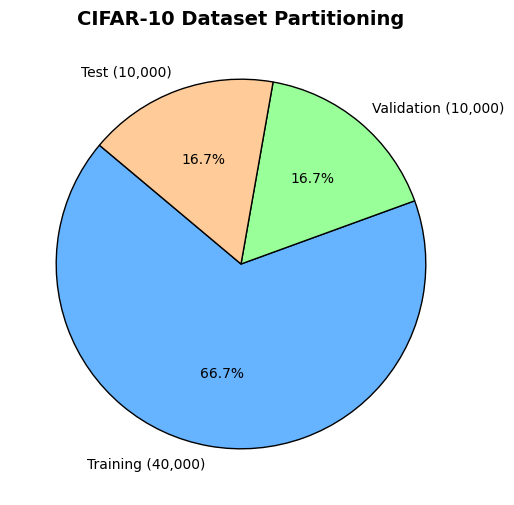

In [ ]:
import matplotlib.pyplot as plt

# Define your split data
split_labels = ['Training (40,000)', 'Validation (10,000)', 'Test (10,000)']
split_sizes = [40000, 10000, 10000]
colors = ['#66b3ff', '#99ff99', '#ffcc99']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    split_sizes,
    labels=split_labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('CIFAR-10 Dataset Partitioning', fontsize=14, fontweight='bold')
plt.show()


### 3.3 Dataset Overview and Structure

Key characteristics of the dataset are summarised to confirm image dimensions, sample counts, and label configuration prior to model development.



In [ ]:
def split_metadata(X, y_int, name):
    # overall stats
    mean = X.mean(axis=(0,1,2))
    std  = X.std(axis=(0,1,2))
    mn, mx = X.min(), X.max()

    # Ensure y_int is 1D before bincount
    y_int_flat = y_int.flatten()

    counts = np.bincount(y_int_flat, minlength=10)

    # build a tidy summary row
    row = {
        "split": name,
        "num_images": X.shape[0],
        "height": X.shape[1],
        "width": X.shape[2],
        "channels": X.shape[3],
        "dtype": str(X.dtype),
        "pixel_min": float(mn),
        "pixel_max": float(mx),
        "pixel_mean_R": float(mean[0]),
        "pixel_mean_G": float(mean[1]),
        "pixel_mean_B": float(mean[2]),
        "pixel_std_R":  float(std[0]),
        "pixel_std_G":  float(std[1]),
        "pixel_std_B":  float(std[2]),
    }
    # add class counts named by label
    for i, cname in enumerate(CLASS_NAMES):
        row[f"class_{i}_{cname}"] = int(counts[i])
    return row

meta = pd.DataFrame([
    split_metadata(x_train, y_train, "train"),
    split_metadata(x_val,   y_val,   "val"),
    split_metadata(x_test,  y_test,  "test"),
])

pd.set_option("display.max_columns", 200)
print(meta)

meta.to_csv("cifar10_split_metadata.csv", index=False)

   split  num_images  height  width  channels  dtype  pixel_min  pixel_max  \
0  train       40000      32     32         3  uint8        0.0      255.0   
1    val       10000      32     32         3  uint8        0.0      255.0   
2   test       10000      32     32         3  uint8        0.0      255.0   

   pixel_mean_R  pixel_mean_G  pixel_mean_B  pixel_std_R  pixel_std_G  \
0    125.228849    122.947519    113.876721    62.986955    62.103600   
1    125.619193    122.961895    113.820032    63.017305    62.029100   
2    126.024641    123.708504    114.854319    62.896391    61.937527   

   pixel_std_B  class_0_airplane  class_1_automobile  class_2_bird  \
0    66.718866              4000                4000          4000   
1    66.648984              1000                1000          1000   
2    66.706056              1000                1000          1000   

   class_3_cat  class_4_deer  class_5_dog  class_6_frog  class_7_horse  \
0         4000          4000         40

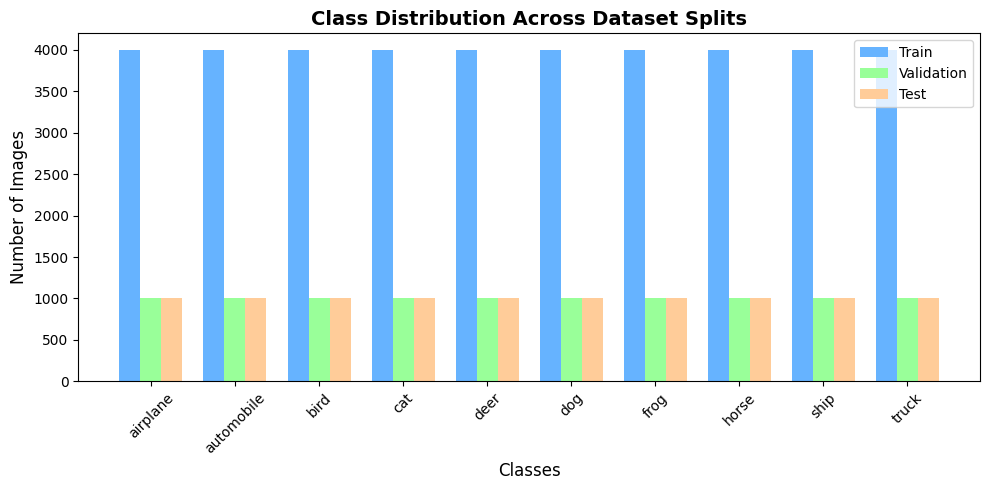

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
train_counts = [4000]*10
val_counts = [1000]*10
test_counts = [1000]*10

x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(10,5))
plt.bar(x - width, train_counts, width, label='Train', color='#66b3ff')
plt.bar(x, val_counts, width, label='Validation', color='#99ff99')
plt.bar(x + width, test_counts, width, label='Test', color='#ffcc99')

plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Class Distribution Across Dataset Splits', fontsize=14, fontweight='bold')
plt.xticks(x, classes, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### 3.4 Data Normalisation

Pixel values are normalised to improve numerical stability and support efficient convergence during model training.




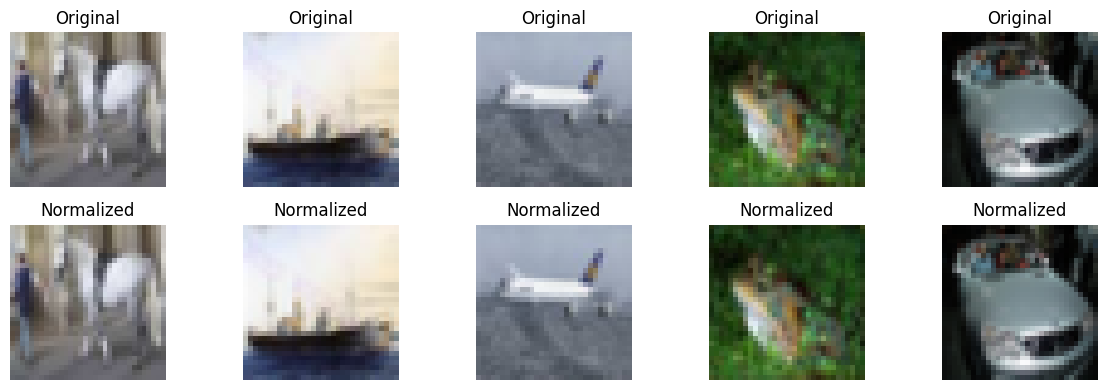

In [ ]:
import matplotlib.pyplot as plt

# Select random sample indices
sample_indices = np.random.choice(len(x_train_full), size=5, replace=False)

# Original (unnormalized) images from x_train_full
original_imgs = x_train_full[sample_indices]
normalized_imgs = x_train_full[sample_indices].astype("float32") / 255.0

# Create figure
plt.figure(figsize=(12, 4))
for i in range(5):
    # Original image
    plt.subplot(2, 5, i+1)
    plt.imshow(original_imgs[i])
    plt.title("Original")
    plt.axis("off")

    # Normalized image
    plt.subplot(2, 5, i+6)
    plt.imshow(normalized_imgs[i])
    plt.title("Normalized")
    plt.axis("off")

plt.tight_layout()
plt.show()


Pixel Intensity Distribution Before and After Normalisation


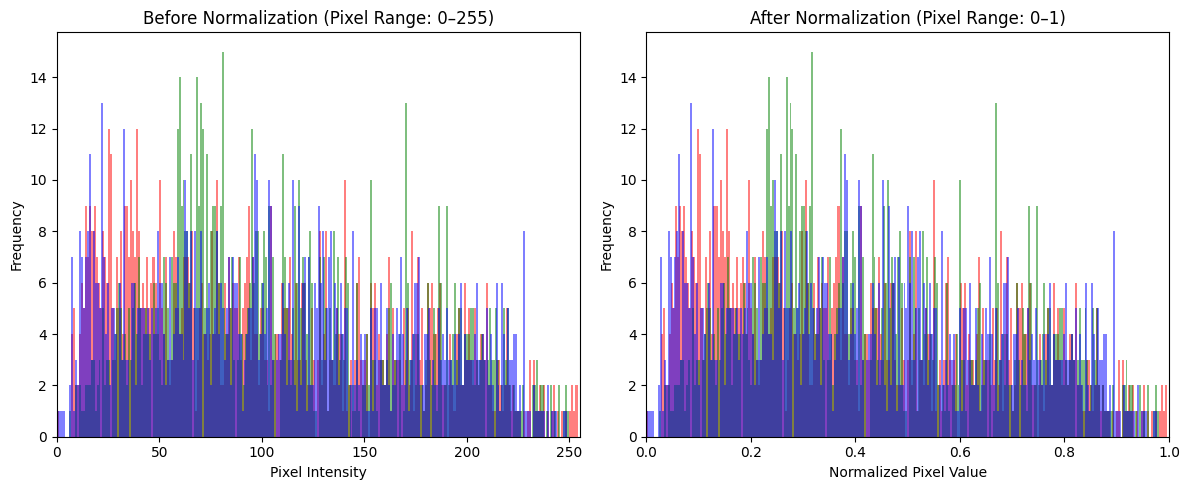

In [ ]:
import matplotlib.pyplot as plt

# Choose one random image
idx = np.random.randint(0, len(x_train_full))
img_original = x_train_full[idx]
img_normalized = img_original.astype("float32") / 255.0

# Plot RGB histograms before and after normalization
colors = ('r', 'g', 'b')
plt.figure(figsize=(12, 5))

# --- Before Normalization ---
plt.subplot(1, 2, 1)
for i, col in enumerate(colors):
    plt.hist(img_original[:, :, i].ravel(), bins=256, color=col, alpha=0.5)
plt.title("Before Normalization (Pixel Range: 0–255)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim(0, 255)

# --- After Normalization ---
plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    plt.hist(img_normalized[:, :, i].ravel(), bins=256, color=col, alpha=0.5)
plt.title("After Normalization (Pixel Range: 0–1)")
plt.xlabel("Normalized Pixel Value")
plt.ylabel("Frequency")
plt.xlim(0, 1)

plt.tight_layout()
plt.show()


### 3.5 Label Encoding

Class labels are transformed into a one-hot encoded format to ensure compatibility with the multi-class classification output layer of the neural network.


/tmp/ipython-input-1383898430.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(y_train[idx])
/tmp/ipython-input-1383898430.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(y_train[idx])
/tmp/ipython-input-1383898430.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(y_train[idx])
/tmp/ipython-input-1383898430.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in fut

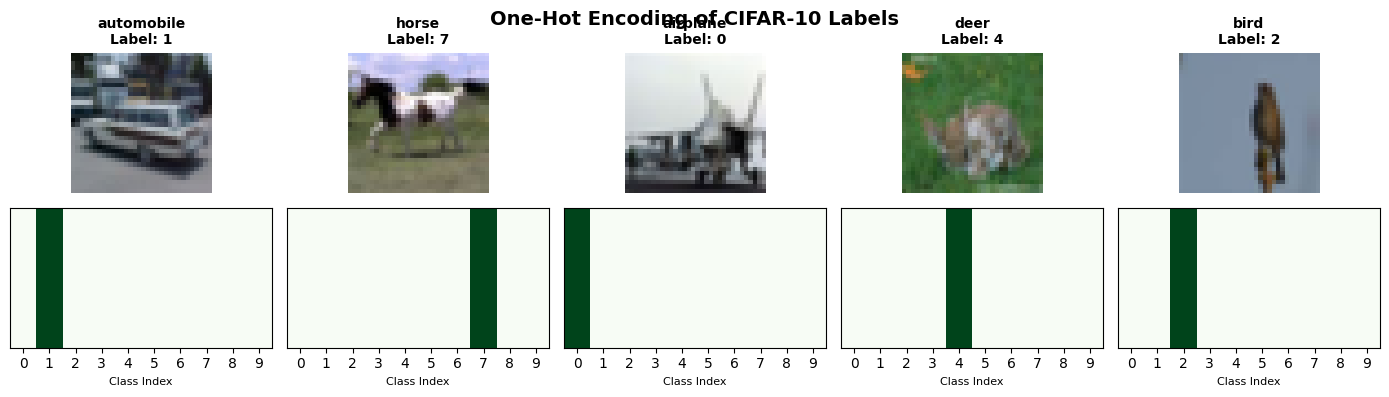

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10

# Load dataset
(x_train, y_train), (_, _) = cifar10.load_data()

# One-hot encode labels
y_train_encoded = to_categorical(y_train, 10)

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Select a few random samples
num_samples = 5
indices = np.random.choice(len(x_train), num_samples, replace=False)

plt.figure(figsize=(14, 4))

for i, idx in enumerate(indices):
    img = x_train[idx]
    label = int(y_train[idx])
    one_hot = y_train_encoded[idx]

    plt.subplot(2, num_samples, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{class_names[label]}\nLabel: {label}", fontsize=10, weight='bold')

    plt.subplot(2, num_samples, i + 1 + num_samples)
    plt.imshow(one_hot.reshape(1, 10), cmap='Greens', aspect='auto')
    plt.xticks(np.arange(10), np.arange(10))
    plt.yticks([])
    plt.xlabel('Class Index', fontsize=8)
    plt.tight_layout()

plt.suptitle("One-Hot Encoding of CIFAR-10 Labels", fontsize=14, weight='bold')
plt.show()


### 3.6 Data Augmentation

Data augmentation techniques are applied to the training set to increase data variability and improve the model’s ability to generalise to unseen images.



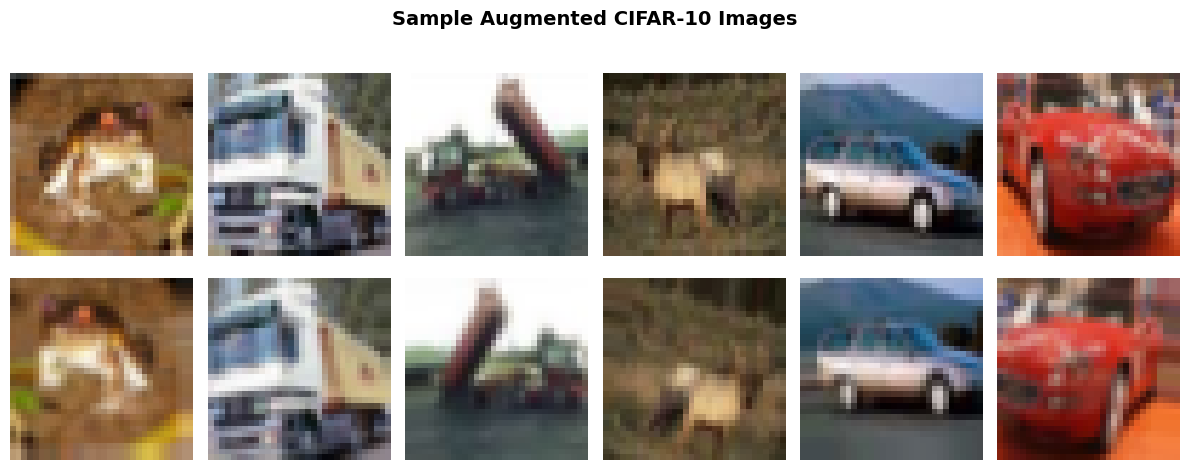

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- 1) Make sure training images for preview are float32 in [0,1]
# (If you've already normalized to [0,1], this keeps them; if not, it rescales.)
x_train_vis = x_train.astype("float32")
if x_train_vis.max() > 1.5:
    x_train_vis /= 255.0

# --- 2) Define augmentation (training only). No rescale here because we already ensured [0,1].
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

# --- 3) Take a small batch and generate augmented versions (same order)
n = 6  # how many to show
samples = x_train_vis[:n]
aug_iter = datagen.flow(samples, batch_size=n, shuffle=False)
augmented = next(aug_iter)

# --- 4) Plot originals (top) vs augmented (bottom)
plt.figure(figsize=(12, 5))
for i in range(n):
    # original
    plt.subplot(2, n, i+1)
    plt.imshow(np.clip(samples[i], 0, 1))
    plt.axis("off")
    if i == 0:
        plt.ylabel("Original", fontsize=11, weight="bold")

    # augmented
    plt.subplot(2, n, n+i+1)
    plt.imshow(np.clip(augmented[i], 0, 1))
    plt.axis("off")
    if i == 0:
        plt.ylabel("Augmented", fontsize=11, weight="bold")

plt.suptitle("Sample Augmented CIFAR-10 Images", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


## **4. Model Architecture and Modelling Approach**



### 4.1 Baseline CNN Model Definition

A baseline Convolutional Neural Network (CNN) is defined to establish an initial performance benchmark for the CIFAR-10 image classification task. This model serves as a reference point for evaluating the impact of subsequent architectural enhancements.


In [ ]:
# --- Setup
import numpy as np, tensorflow as tf, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns  # only for prettier confusion matrix

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# --- Load CIFAR-10
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train_full = y_train_full.flatten()
y_test       = y_test.flatten()

# --- Stratified validation split (20% of train)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.20, stratify=y_train_full, random_state=SEED
)

# --- Normalise to [0,1] and one-hot encode
x_train = x_train.astype("float32")/255.0
x_val   = x_val.astype("float32")/255.0
x_test  = x_test.astype("float32")/255.0

num_classes = 10
y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_oh   = tf.keras.utils.to_categorical(y_val,   num_classes)
y_test_oh  = tf.keras.utils.to_categorical(y_test,  num_classes)

CLASS_NAMES = np.array(["airplane","automobile","bird","cat","deer",
                        "dog","frog","horse","ship","truck"])


In [ ]:
from tensorflow.keras import layers, models

def build_model1():
    model = models.Sequential([
        layers.Input(shape=(32,32,3)),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Conv2D(128,(3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model1 = build_model1()
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

### 4.2 Baseline Model Training and Callbacks

The baseline model is trained using the prepared dataset, with simple callbacks applied to monitor training progress and reduce the risk of overfitting.


In [ ]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                         patience=3, verbose=1, min_lr=1e-5),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6,
                                     restore_best_weights=True, verbose=1)
]

EPOCHS = 15  # baseline: keep modest
BATCH  = 64

history1 = model1.fit(
    x_train, y_train_oh,
    validation_data=(x_val, y_val_oh),
    epochs=EPOCHS, batch_size=BATCH,
    callbacks=callbacks, verbose=1
)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3386 - loss: 1.7806 - val_accuracy: 0.5870 - val_loss: 1.1863 - learning_rate: 0.0010
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5857 - loss: 1.1731 - val_accuracy: 0.6498 - val_loss: 1.0120 - learning_rate: 0.0010
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6644 - loss: 0.9605 - val_accuracy: 0.6800 - val_loss: 0.9268 - learning_rate: 0.0010
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7097 - loss: 0.8322 - val_accuracy: 0.6979 - val_loss: 0.8813 - learning_rate: 0.0010
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7424 - loss: 0.7398 - val_accuracy: 0.7046 - val_loss: 0.8693 - learning_rate: 0.0010
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7692 - loss: 0.6667 - val_accuracy: 0.7061 - val_loss: 0.8752 - learning_rate: 0.0010
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7927 - loss: 0.5978 - 

### 4.3 Training and Validation Performance Analysis

Training and validation accuracy and loss curves are visualised to assess learning behaviour and identify potential overfitting or underfitting trends.


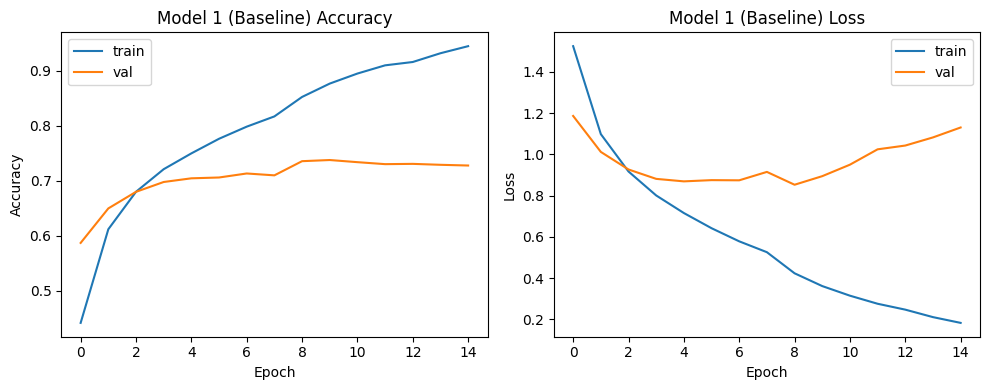

In [ ]:
def plot_history(h, title_prefix="Model 1"):
    plt.figure(figsize=(10,4))
    # accuracy
    plt.subplot(1,2,1)
    plt.plot(h.history['accuracy'], label='train')
    plt.plot(h.history['val_accuracy'], label='val')
    plt.title(f"{title_prefix} Accuracy")
    plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()
    # loss
    plt.subplot(1,2,2)
    plt.plot(h.history['loss'], label='train')
    plt.plot(h.history['val_loss'], label='val')
    plt.title(f"{title_prefix} Loss")
    plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
    plt.tight_layout(); plt.show()

plot_history(history1, "Model 1 (Baseline)")


### 4.4 Baseline Model Evaluation

The trained model is evaluated on validation and test datasets to assess generalisation performance beyond the training data.


In [ ]:
tr_loss, tr_acc = model1.evaluate(x_train, y_train_oh, verbose=0)
va_loss, va_acc = model1.evaluate(x_val,   y_val_oh,   verbose=0)
te_loss, te_acc = model1.evaluate(x_test,  y_test_oh,  verbose=0)

print(f"Model 1 — Accuracy  | Train: {tr_acc:.4f}  Val: {va_acc:.4f}  Test: {te_acc:.4f}")
print(f"Model 1 — Loss      | Train: {tr_loss:.4f}  Val: {va_loss:.4f}  Test: {te_loss:.4f}")


Model 1 — Accuracy  | Train: 0.8753  Val: 0.7358  Test: 0.7289
Model 1 — Loss      | Train: 0.3666  Val: 0.8529  Test: 0.8782


### 4.5 Class-Level Performance Analysis

A confusion matrix and classification report are used to examine class-level performance and identify common misclassification patterns across object categories.


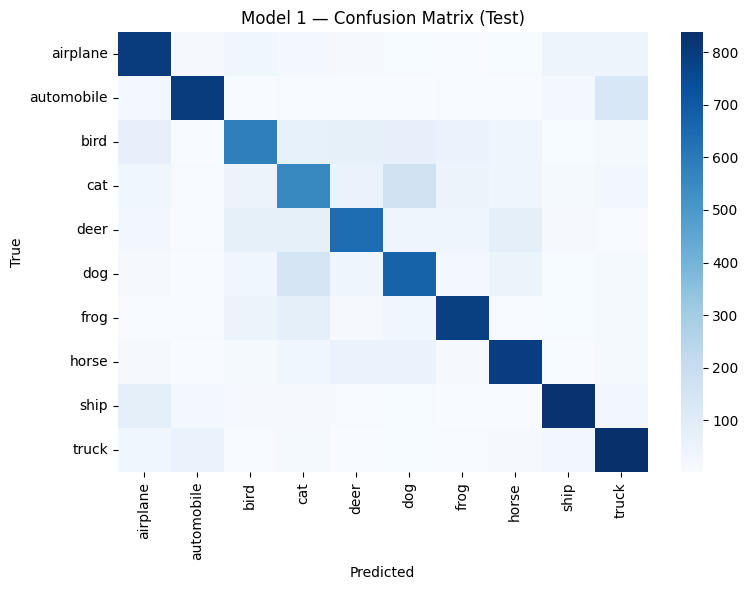

Model 1 — Classification Report (Test):
              precision    recall  f1-score   support

    airplane       0.73      0.80      0.76      1000
  automobile       0.88      0.80      0.84      1000
        bird       0.68      0.59      0.63      1000
         cat       0.54      0.55      0.55      1000
        deer       0.71      0.64      0.67      1000
         dog       0.63      0.67      0.65      1000
        frog       0.80      0.79      0.79      1000
       horse       0.76      0.79      0.77      1000
        ship       0.85      0.82      0.84      1000
       truck       0.73      0.84      0.78      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [ ]:
# Predict class indices on test set
y_pred_probs = model1.predict(x_test, batch_size=256, verbose=0)
y_pred = y_pred_probs.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap='Blues', fmt='d',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Model 1 — Confusion Matrix (Test)")
plt.tight_layout(); plt.show()

# Precision / Recall / F1
print("Model 1 — Classification Report (Test):")
print(classification_report(y_test, y_pred, target_names=CLASS_NAMES))


### 4.6 Enhanced CNN Model Definition

An enhanced CNN architecture is introduced to improve classification performance by increasing model capacity and incorporating additional regularisation techniques.


In [ ]:
import numpy as np, tensorflow as tf, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Reuse: x_train, x_val, x_test are float32 in [0,1]; y_*_oh are one-hot; CLASS_NAMES defined earlier.

# --- Data augmentation as Keras preprocessing layers (train-time only) ---
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", seed=42),
    tf.keras.layers.RandomRotation(0.1, seed=42),
    tf.keras.layers.RandomZoom(0.1, seed=42),
], name="augmentation")

from tensorflow.keras import layers, models

def build_model2():
    inputs = layers.Input(shape=(32,32,3))
    x = data_augmentation(inputs)               # applies only during training
    # Block 1
    x = layers.Conv2D(32, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(32, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)
    # Block 2
    x = layers.Conv2D(64, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(64, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)
    # Block 3
    x = layers.Conv2D(128, (3,3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)
    # Head
    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = models.Model(inputs, outputs, name="Model2_EnhancedCNN")
    return model

model2 = build_model2()
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model2.summary()

# Train (longer with same safety callbacks)

callbacks2 = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                         patience=3, verbose=1, min_lr=1e-5),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6,
                                     restore_best_weights=True, verbose=1)
]

EPOCHS2 = 25
BATCH2  = 64

history2 = model2.fit(
    x_train, y_train_oh,
    validation_data=(x_val, y_val_oh),
    epochs=EPOCHS2, batch_size=BATCH2,
    callbacks=callbacks2, verbose=1
)

Model: "Model2_EnhancedCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ augmentation (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 668,842 (2.55 MB)

 Trainable params: 667,690 (2.55 MB)

 Non-trainable params: 1,152 (4.50 KB)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.3217 - loss: 1.9889 - val_accuracy: 0.4031 - val_loss: 1.7298 - learning_rate: 0.0010
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.4903 - loss: 1.4077 - val_accuracy: 0.5378 - val_loss: 1.3594 - learning_rate: 0.0010
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5569 - loss: 1.2383 - val_accuracy: 0.5618 - val_loss: 1.2403 - learning_rate: 0.0010
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5990 - loss: 1.1306 - val_accuracy: 0.5956 - val_loss: 1.2169 - learning_rate: 0.0010
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.6237 - loss: 1.0715 - val_accuracy: 0.5792 - val_loss: 1.2679 - learning_rate: 0.0010
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6409 - loss: 1.0228 - val_accuracy: 0.5799 - val_loss: 1.2268 - learning_rate: 0.0010
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6552 - l

### 4.7 Enhanced Model Training and Evaluation

The enhanced model is trained and evaluated using the same workflow as the baseline model to enable a fair comparison of performance.



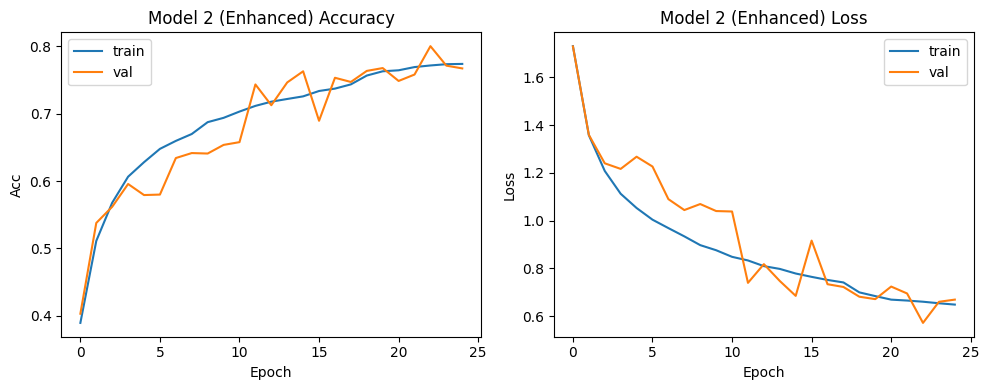

In [ ]:
def plot_history(h, title_prefix="Model 2"):
    plt.figure(figsize=(10,4))
    # accuracy
    plt.subplot(1,2,1)
    plt.plot(h.history['accuracy'], label='train')
    plt.plot(h.history['val_accuracy'], label='val')
    plt.title(f"{title_prefix} Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Acc"); plt.legend()
    # loss
    plt.subplot(1,2,2)
    plt.plot(h.history['loss'], label='train')
    plt.plot(h.history['val_loss'], label='val')
    plt.title(f"{title_prefix} Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
    plt.tight_layout(); plt.show()

plot_history(history2, "Model 2 (Enhanced)")


### 4.8 Enhanced Model Confusion Matrix and Classification Report

Class-level performance of the enhanced CNN model is analysed using a confusion matrix and classification report to identify improvements and remaining misclassification patterns.


Model 2 — Accuracy  | Train: 0.8270  Val: 0.8001  Test: 0.7950
Model 2 — Loss      | Train: 0.4918  Val: 0.5717  Test: 0.5996


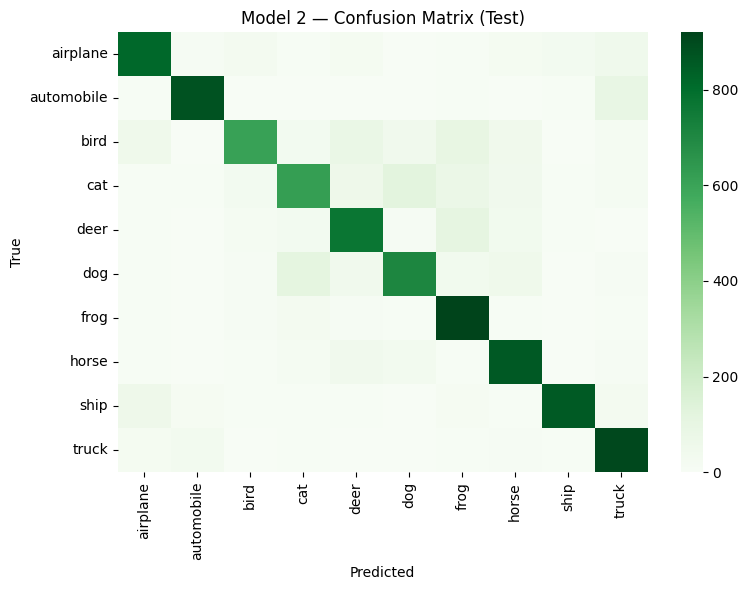

Model 2 — Classification Report (Test):
              precision    recall  f1-score   support

    airplane       0.82      0.82      0.82      1000
  automobile       0.92      0.88      0.90      1000
        bird       0.84      0.61      0.71      1000
         cat       0.71      0.62      0.66      1000
        deer       0.74      0.77      0.75      1000
         dog       0.76      0.71      0.73      1000
        frog       0.71      0.92      0.80      1000
       horse       0.78      0.86      0.82      1000
        ship       0.93      0.86      0.89      1000
       truck       0.79      0.91      0.84      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.79     10000
weighted avg       0.80      0.80      0.79     10000



In [ ]:
tr2_loss, tr2_acc = model2.evaluate(x_train, y_train_oh, verbose=0)
va2_loss, va2_acc = model2.evaluate(x_val,   y_val_oh,   verbose=0)
te2_loss, te2_acc = model2.evaluate(x_test,  y_test_oh,  verbose=0)

print(f"Model 2 — Accuracy  | Train: {tr2_acc:.4f}  Val: {va2_acc:.4f}  Test: {te2_acc:.4f}")
print(f"Model 2 — Loss      | Train: {tr2_loss:.4f}  Val: {va2_loss:.4f}  Test: {te2_loss:.4f}")

# Predictions for confusion matrix
y2_pred_probs = model2.predict(x_test, batch_size=256, verbose=0)
y2_pred = y2_pred_probs.argmax(axis=1)

cm2 = confusion_matrix(y_test, y2_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=False, cmap='Greens', fmt='d',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Model 2 — Confusion Matrix (Test)")
plt.tight_layout(); plt.show()

print("Model 2 — Classification Report (Test):")
print(classification_report(y_test, y2_pred, target_names=CLASS_NAMES))


### 4.9 Model Performance Comparison

A comparative analysis is conducted between the baseline and enhanced CNN models to assess the impact of architectural improvements. Key performance metrics, including training and validation accuracy, are compared to support model selection.


In [ ]:
try:
    # requires tr_acc, va_acc, te_acc from Model 1 block to exist
    import pandas as pd
    cmp = pd.DataFrame({
        "Metric": ["Train Acc","Val Acc","Test Acc","Train Loss","Val Loss","Test Loss"],
        "Model 1 (Baseline)":[tr_acc, va_acc, te_acc, tr_loss, va_loss, te_loss],
        "Model 2 (Enhanced)":[tr2_acc, va2_acc, te2_acc, tr2_loss, va2_loss, te2_loss]
    })
    display(cmp)
except NameError:
    pass


,Metric,Model 1 (Baseline),Model 2 (Enhanced)
0,Train Acc,0.875325,0.826975
1,Val Acc,0.735800,0.800100
2,Test Acc,0.728900,0.795000
3,Train Loss,0.366583,0.491823
4,Val Loss,0.852895,0.571677
5,Test Loss,0.878223,0.599553


## **5. Conclusions and Future Work**

This project demonstrated the application of convolutional neural networks to a multi-class image classification problem using the CIFAR-10 dataset. A baseline CNN was first developed to establish a performance benchmark, followed by an enhanced CNN architecture designed to improve classification performance through increased model capacity and regularisation techniques.

Evaluation results showed that the enhanced model achieved improved performance compared to the baseline model, as reflected in training and validation metrics as well as class-level evaluation using confusion matrices and classification reports. While overall accuracy provided a useful summary measure, class-level analysis highlighted that certain visually similar object categories remained challenging to distinguish, indicating areas for further improvement.

### Future Work

Potential extensions to this work include:
- Applying transfer learning using pre-trained architectures such as VGG or ResNet to improve feature extraction
- Performing more extensive hyperparameter tuning to optimise model performance
- Exploring additional data augmentation strategies to further enhance generalisation
- Evaluating alternative performance metrics, including per-class precision and recall
- Investigating deployment of the trained model for real-time image inference

These enhancements could further strengthen model robustness and improve performance on complex image classification tasks.
